# House Prices - Advanced Regression Techniques
## Predict sales prices and practice feature engineering, RFs, and gradient boosting
This project is from [Kaggle]("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview").

### Practice Skills
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

%matplotlib inline

### Explore Data Analysis (EDA)

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

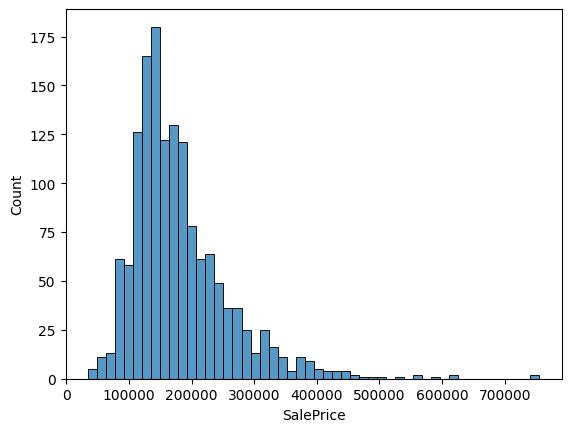

In [4]:
# check how the saleprice distribute
sns.histplot(df_train.SalePrice, bins=50)

### Data cleaning

In [5]:
df_train.columns = df_train.columns.str.lower()
df_train.head(2)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [6]:
# translate mssubclass column to actual names
mssubclass_values = {
    20:	"1-STORY 1946 & NEWER ALL STYLES",
    30:	"1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45:	"1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60:	"2-STORY 1946 & NEWER",
    70:	"2-STORY 1945 & OLDER",
    75:	"2-1/2 STORY ALL AGES",
    80:	"SPLIT OR MULTI-LEVEL",
    85:	"SPLIT FOYER",
    90:	"DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}

df_train.mssubclass = df_train.mssubclass.map(mssubclass_values)
df_train.head(2)


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [7]:
# translate OverallQual, OverallCond column to actual names
overallqual_values = {
       10:	"Very Excellent",
       9:	"Excellent",
       8:	"Very Good",
       7:	"Good",
       6:	"Above Average",
       5:	"Average",
       4:	"Below Average",
       3:	"Fair",
       2:	"Poor",
       1:	"Very Poor",
}
df_train.overallqual = df_train.overallqual.map(overallqual_values)

overallcond_values = {
      10:	"Very Excellent",
       9:	"Excellent",
       8:	"Very Good",
       7:	"Good",
       6:	"Above Average",
       5:	"Average",
       4:	"Below Average",
       3:	"Fair",
       2:	"Poor",
       1:	"Very Poor",
}
df_train.overallcond = df_train.overallcond.map(overallcond_values)
df_train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
for c in list(df_train.dtypes[df_train.dtypes == "object"].index):
    df_train[c] = df_train[c].str.replace(" ", "_").str.lower()

df_train.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,2-story_1946_&_newer,rl,65.0,8450,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,2,2008,wd,normal,208500
1,2,1-story_1946_&_newer_all_styles,rl,80.0,9600,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,5,2007,wd,normal,181500
2,3,2-story_1946_&_newer,rl,68.0,11250,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,9,2008,wd,normal,223500


In [9]:
# check the numerical columns
df_train.describe().round().T

,count,mean,std,min,25%,50%,75%,max
id,1460.0,730.0,422.0,1.0,366.0,730.0,1095.0,1460.0
lotfrontage,1201.0,70.0,24.0,21.0,59.0,69.0,80.0,313.0
lotarea,1460.0,10517.0,9981.0,1300.0,7554.0,9478.0,11602.0,215245.0
yearbuilt,1460.0,1971.0,30.0,1872.0,1954.0,1973.0,2000.0,2010.0
yearremodadd,1460.0,1985.0,21.0,1950.0,1967.0,1994.0,2004.0,2010.0
masvnrarea,1452.0,104.0,181.0,0.0,0.0,0.0,166.0,1600.0
bsmtfinsf1,1460.0,444.0,456.0,0.0,0.0,384.0,712.0,5644.0
bsmtfinsf2,1460.0,47.0,161.0,0.0,0.0,0.0,0.0,1474.0
bsmtunfsf,1460.0,567.0,442.0,0.0,223.0,478.0,808.0,2336.0
totalbsmtsf,1460.0,1057.0,439.0,0.0,796.0,992.0,1298.0,6110.0


In [10]:
# dont need the id
df_train = df_train[list(df_train.columns)[1:]]
df_train

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,2-story_1946_&_newer,rl,65.0,8450,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,NaN,NaN,0,2,2008,wd,normal,208500
1,1-story_1946_&_newer_all_styles,rl,80.0,9600,pave,NaN,reg,lvl,allpub,fr2,...,0,NaN,NaN,NaN,0,5,2007,wd,normal,181500
2,2-story_1946_&_newer,rl,68.0,11250,pave,NaN,ir1,lvl,allpub,inside,...,0,NaN,NaN,NaN,0,9,2008,wd,normal,223500
3,2-story_1945_&_older,rl,60.0,9550,pave,NaN,ir1,lvl,allpub,corner,...,0,NaN,NaN,NaN,0,2,2006,wd,abnorml,140000
4,2-story_1946_&_newer,rl,84.0,14260,pave,NaN,ir1,lvl,allpub,fr2,...,0,NaN,NaN,NaN,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2-story_1946_&_newer,rl,62.0,7917,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,NaN,NaN,0,8,2007,wd,normal,175000
1456,1-story_1946_&_newer_all_styles,rl,85.0,13175,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,mnprv,NaN,0,2,2010,wd,normal,210000
1457,2-story_1945_&_older,rl,66.0,9042,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,gdprv,shed,2500,5,2010,wd,normal,266500
1458,1-story_1946_&_newer_all_styles,rl,68.0,9717,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,NaN,NaN,0,4,2010,wd,normal,142125


In [11]:
# split the train dataset
from sklearn.model_selection import train_test_split
df_train_full, df_train_test = train_test_split(df_train, test_size=0.2, random_state=11)
df_train_train, df_train_val = train_test_split(df_train_full, test_size=0.25,random_state=11)

y_train = np.log1p(df_train_train.saleprice.values)
y_val = np.log1p(df_train_val.saleprice.values)
y_test = np.log1p(df_train_test.saleprice.values)

In [12]:
df_train_train = df_train_train.reset_index(drop=True)
df_train_val = df_train_val.reset_index(drop=True)
df_train_test = df_train_test.reset_index(drop=True)

In [13]:
# delete target value
del df_train_train["saleprice"]
del df_train_val["saleprice"]
del df_train_test["saleprice"]

In [14]:
# fill nan with 0
df_train_train = df_train_train.fillna(0)
df_train_val = df_train_val.fillna(0)

In [15]:
#encode categorical variable
dict_train = df_train_train.to_dict(orient="records")
dict_val = df_train_val.to_dict(orient="records")

In [16]:
# feature matrix
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

### Decision tree model

In [17]:
# train a decision tree model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
# compare rmse in train data
y_pred = dt.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"rmse: {rmse}")

rmse: 0.0


In [19]:
# compare rmse in val data
y_pred = dt.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"rmse: {rmse}")

rmse: 0.22131685712310514


In [20]:
# model is overfitting because rmse in training is 0
# let us tune the max_depth
max_depth = [1, 10, 20, 30, 40, 50, 60, 70, None]
rmse_list = []
for d in max_depth:
    dt = DecisionTreeRegressor(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_list.append(rmse)
    print(f"max_depth:{d} --> rmse: {round(rmse,3)}")

max_depth:1 --> rmse: 0.324
max_depth:10 --> rmse: 0.223
max_depth:20 --> rmse: 0.229
max_depth:30 --> rmse: 0.221


max_depth:40 --> rmse: 0.223
max_depth:50 --> rmse: 0.225
max_depth:60 --> rmse: 0.208
max_depth:70 --> rmse: 0.212
max_depth:None --> rmse: 0.236


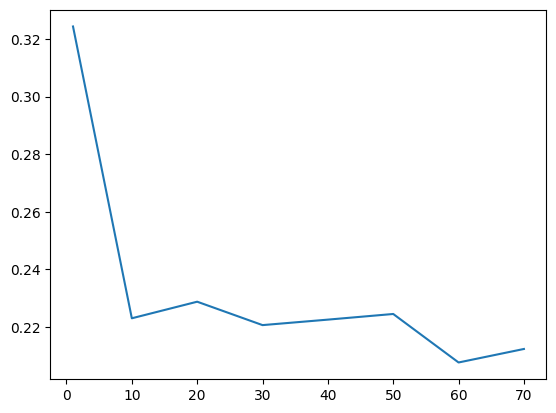

In [21]:
# plot rmse
plt.plot(max_depth, rmse_list)
plt.show()

In [22]:
# train with max_depth 10
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"train rmse: {rmse}")

y_pred = dt.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"val rmse: {rmse}")

train rmse: 0.048755409858924285
val rmse: 0.21898623968645267


In [23]:
# tuning min_saples_leaf
scores = []
for d in [10, 20, 40, 70]:
    for s in [1, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeRegressor(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        scores.append((d, s, rmse))


In [24]:
columns = ["max_depth", "min_samples_leaf", "rmse"]
df_scores = pd.DataFrame(scores, columns=columns)

In [25]:
df_scores_pivot = df_scores.pivot(index="min_samples_leaf", columns=["max_depth"], values=["rmse"])
df_scores_pivot.round(3)

rmse                     
max_depth            10     20     40     70
min_samples_leaf                            
1                 0.223  0.224  0.217  0.213
5                 0.212  0.212  0.212  0.212
10                0.218  0.218  0.218  0.218
15                0.220  0.220  0.220  0.220
20                0.224  0.224  0.224  0.224
100               0.255  0.255  0.255  0.255
200               0.300  0.300  0.300  0.300
500               0.418  0.418  0.418  0.418

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

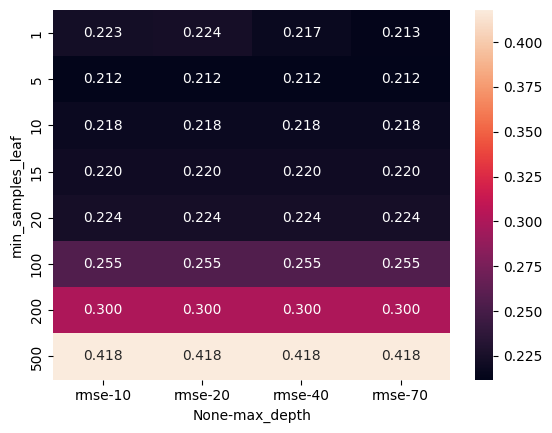

In [26]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [27]:
dt = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"rmse: {rmse}")

rmse: 0.21208055951244534


In [28]:
# features to split the model
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- yearbuilt <= 1985.50
|   |--- grlivarea <= 1369.00
|   |   |--- centralair=n <= 0.50
|   |   |   |--- totalbsmtsf <= 922.00
|   |   |   |   |--- bsmtfinsf1 <= 348.50
|   |   |   |   |   |--- grlivarea <= 1303.00
|   |   |   |   |   |   |--- garagearea <= 228.00
|   |   |   |   |   |   |   |--- totalbsmtsf <= 681.00
|   |   |   |   |   |   |   |   |--- paveddrive=y <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [11.40]
|   |   |   |   |   |   |   |   |--- paveddrive=y >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [11.22]
|   |   |   |   |   |   |   |--- totalbsmtsf >  681.00
|   |   |   |   |   |   |   |   |--- value: [11.51]
|   |   |   |   |   |   |--- garagearea >  228.00
|   |   |   |   |   |   |   |--- totalbsmtsf <= 553.00
|   |   |   |   |   |   |   |   |--- garagearea <= 364.00
|   |   |   |   |   |   |   |   |   |--- value: [11.38]
|   |   |   |   |   |   |   |   |--- garagearea >  364.00
|   |   |   |   |   |   |   |   |   |--- value: [11.54]
|   |   | 

### Random forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
#train the model
rmse_list = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    rmse_list.append((n, rmse))

In [31]:
# turn to dataframe
df_rmse = pd.DataFrame(rmse_list, columns=["n_estimators", "rmse"])

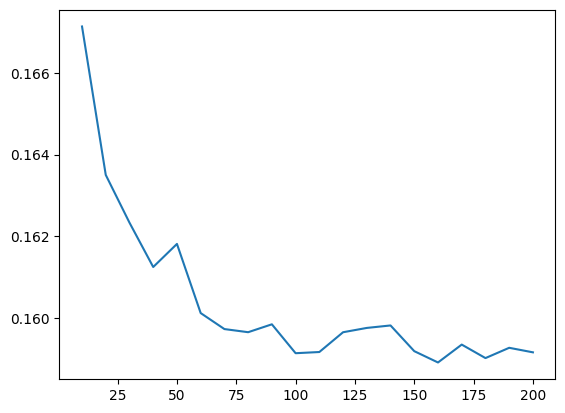

In [32]:
# plot the graph
plt.plot(df_rmse.n_estimators, df_rmse.rmse)

In [33]:
# add in max_depth
rmse_list = []
for d in [20, 30, 40, 50, 60, 70]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   random_state=1,
                                   n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        rmse_list.append((d, n, rmse))


In [34]:
# turn to dataframe
df_rmse = pd.DataFrame(rmse_list, columns=["max_depth", "n_estimators", "rmse"])

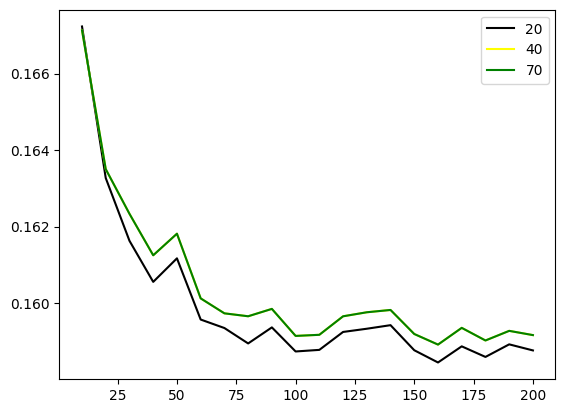

In [35]:
#plot graph
colors = ["black", "yellow", "green"]
depths = [20, 40, 70]
for d, c in zip(depths, colors):
    df_subset = df_rmse[df_rmse.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d, color=c)

plt.legend()


In [36]:
# add min_samples_leaf
rmse_list = []
for s in [1, 5, 10, 15, 20]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=20,
                                   min_samples_leaf=s,
                                   random_state=1,
                                   n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        rmse_list.append((s, n, rmse))

In [37]:
# turn to dataframe
df_rmse = pd.DataFrame(rmse_list, columns=["min_samples_leaf", "n_estimators", "rmse"])

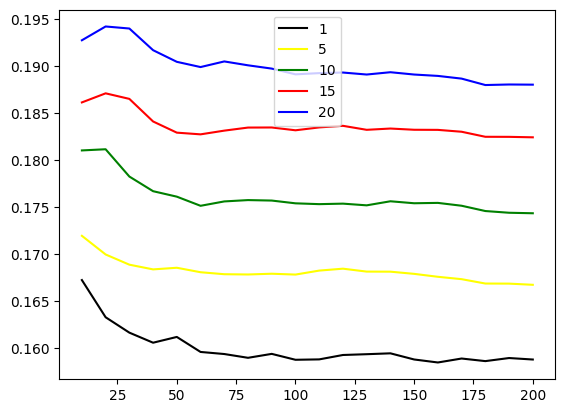

In [38]:
#plot graph
colors = ["black", "yellow", "green", "red", "blue"]
samples = [1, 5, 10, 15, 20]
for s, c in zip(samples, colors):
    df_subset = df_rmse[df_rmse.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.rmse, label=s, color=c)

plt.legend()

In [39]:
# min_samples_leaf = 1, max_depth=20, n_estimators=160
# final RandomForest model
rf = RandomForestRegressor(n_estimators=160,
                           max_depth=20,
                           min_samples_leaf=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=160)

In [40]:
# score improve
y_pred = rf.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

0.1585301581894712

### Gradient boosting and XGBoost

In [41]:
import xgboost as xgb

In [42]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [43]:
%%capture output

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "nthread": 8,
    "seed": 1,
    "silent": 1
}

watchlist = [(dtrain, "train"), (dval, "val")]

# train the model
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

In [44]:
print(np.array(output.stdout.split("\n")))

['[0]\ttrain-rmse:0.29785\tval-rmse:0.33550'
 '[10]\ttrain-rmse:0.05404\tval-rmse:0.16637'
 '[20]\ttrain-rmse:0.03507\tval-rmse:0.16036'
 '[30]\ttrain-rmse:0.02722\tval-rmse:0.15877'
 '[40]\ttrain-rmse:0.02011\tval-rmse:0.15805'
 '[50]\ttrain-rmse:0.01554\tval-rmse:0.15780'
 '[60]\ttrain-rmse:0.01245\tval-rmse:0.15773'
 '[70]\ttrain-rmse:0.01013\tval-rmse:0.15767'
 '[80]\ttrain-rmse:0.00804\tval-rmse:0.15790'
 '[90]\ttrain-rmse:0.00615\tval-rmse:0.15803'
 '[99]\ttrain-rmse:0.00523\tval-rmse:0.15795' '']


In [45]:
# create parse xgb result function
def xgb_output(output):
    results = []
    for line in output.stdout.strip().split("\n"):
        it_line, train_line, val_line = line.split("\t")

        it = int(it_line.strip("[]"))
        train = float(train_line.split(":")[1])
        val = float(val_line.split(":")[1])
        results.append((it, train, val))

    columns = ["number_iter", "train_rmse", "val_rmse"]
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

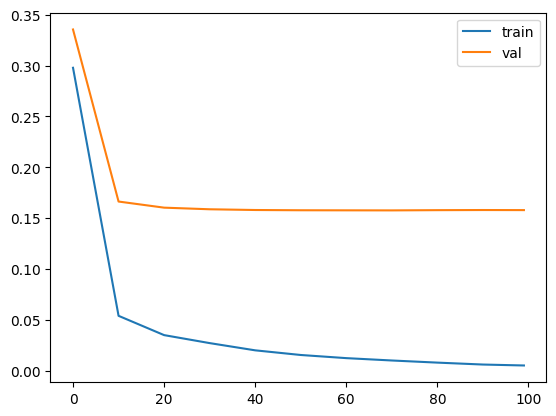

In [46]:
# plot xgb result
df_score = xgb_output(output)
plt.plot(df_score.number_iter, df_score.train_rmse, label="train")
plt.plot(df_score.number_iter, df_score.val_rmse, label="val")
plt.legend()

### xgb parameter tuning

In [47]:
def train_xgb(eta=0.3, max_depth=6, min_child_weight=1, objective="reg:squarederror"):
    xgb_params = {
    "eta": eta,
    "max_depth": max_depth,
    "min_child_weight": min_child_weight,
    "objective": objective,
    "nthread": 8,
    "seed": 1,
    "silent": 1,
}

    watchlist = [(dtrain, "train"), (dval, "val")]
    model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

In [48]:
# tune rmse

rmse_obj = {}
keys = []
for e in [0.01, 0.1, 0.3, 0.7]:
    train_xgb(eta=e)
    key = f"eta={e}"
    keys.append(key)
    rmse_obj[key] = xgb_output(output)


[0]	train-rmse:0.39189	val-rmse:0.41492


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:27:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[10]	train-rmse:0.36057	val-rmse:0.38736
[20]	train-rmse:0.33244	val-rmse:0.36273
[30]	train-rmse:0.30701	val-rmse:0.34107
[40]	train-rmse:0.28389	val-rmse:0.32177
[50]	train-rmse:0.26236	val-rmse:0.30332
[60]	train-rmse:0.24268	val-rmse:0.28657
[70]	train-rmse:0.22481	val-rmse:0.27160
[80]	train-rmse:0.20859	val-rmse:0.25866
[90]	train-rmse:0.19385	val-rmse:0.24740
[99]	train-rmse:0.18164	val-rmse:0.23839
[0]	train-rmse:0.36219	val-rmse:0.38903
[10]	train-rmse:0.16417	val-rmse:0.22736
[20]	train-rmse:0.08892	val-rmse:0.18175
[30]	train-rmse:0.05773	val-rmse:0.16695
[40]	train-rmse:0.04350	val-rmse:0.16208


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:27:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[50]	train-rmse:0.03543	val-rmse:0.15915
[60]	train-rmse:0.03113	val-rmse:0.15778
[70]	train-rmse:0.02820	val-rmse:0.15730
[80]	train-rmse:0.02579	val-rmse:0.15673
[90]	train-rmse:0.02410	val-rmse:0.15637
[99]	train-rmse:0.02254	val-rmse:0.15621
[0]	train-rmse:0.29785	val-rmse:0.33550
[10]	train-rmse:0.05404	val-rmse:0.16637
[20]	train-rmse:0.03507	val-rmse:0.16036
[30]	train-rmse:0.02722	val-rmse:0.15877
[40]	train-rmse:0.02011	val-rmse:0.15805
[50]	train-rmse:0.01554	val-rmse:0.15780
[60]	train-rmse:0.01245	val-rmse:0.15773
[70]	train-rmse:0.01013	val-rmse:0.15767
[80]	train-rmse:0.00804	val-rmse:0.15790
[90]	train-rmse:0.00615	val-rmse:0.15803
[99]	train-rmse:0.00523	val-rmse:0.15795
[0]	train-rmse:0.18438	val-rmse:0.25678
[10]	train-rmse:0.04497	val-rmse:0.19162
[20]	train-rmse:0.02425	val-rmse:0.19264
[30]	train-rmse:0.01345	val-rmse:0.19152
[40]	train-rmse:0.00629	val-rmse:0.19135


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:27:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[50]	train-rmse:0.00301	val-rmse:0.19188
[60]	train-rmse:0.00166	val-rmse:0.19184
[70]	train-rmse:0.00094	val-rmse:0.19182
[80]	train-rmse:0.00074	val-rmse:0.19180
[90]	train-rmse:0.00074	val-rmse:0.19180
[99]	train-rmse:0.00074	val-rmse:0.19180


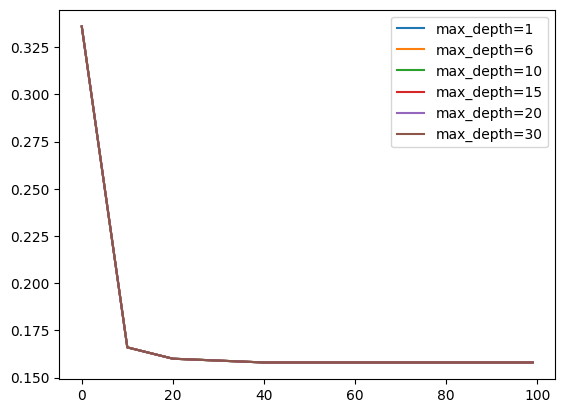

In [55]:
for k in keys:
    plt.plot(rmse_obj[k].number_iter, round(rmse_obj[k].val_rmse, 3), label=k)
    plt.legend()

In [56]:
# tune max_depth
rmse_obj = {}
keys = []
for d in [1, 6, 10, 15, 20, 30]:
    train_xgb(eta=0.01, max_depth=d)
    key = f"max_depth={d}"
    keys.append(key)
    rmse_obj[key] = xgb_output(output)

[0]	train-rmse:0.39373	val-rmse:0.41633
[10]	train-rmse:0.37977	val-rmse:0.40226
[20]	train-rmse:0.36712	val-rmse:0.38943


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:31:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[30]	train-rmse:0.35564	val-rmse:0.37778
[40]	train-rmse:0.34519	val-rmse:0.36713
[50]	train-rmse:0.33555	val-rmse:0.35740
[60]	train-rmse:0.32659	val-rmse:0.34839
[70]	train-rmse:0.31820	val-rmse:0.34002
[80]	train-rmse:0.31034	val-rmse:0.33237
[90]	train-rmse:0.30296	val-rmse:0.32492
[99]	train-rmse:0.29670	val-rmse:0.31867
[0]	train-rmse:0.39189	val-rmse:0.41492
[10]	train-rmse:0.36057	val-rmse:0.38736


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:31:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[20]	train-rmse:0.33244	val-rmse:0.36273
[30]	train-rmse:0.30701	val-rmse:0.34107
[40]	train-rmse:0.28389	val-rmse:0.32177
[50]	train-rmse:0.26236	val-rmse:0.30332
[60]	train-rmse:0.24268	val-rmse:0.28657
[70]	train-rmse:0.22481	val-rmse:0.27160
[80]	train-rmse:0.20859	val-rmse:0.25866
[90]	train-rmse:0.19385	val-rmse:0.24740
[99]	train-rmse:0.18164	val-rmse:0.23839
[0]	train-rmse:0.39176	val-rmse:0.41493
[10]	train-rmse:0.35910	val-rmse:0.38758


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:31:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[20]	train-rmse:0.32950	val-rmse:0.36323
[30]	train-rmse:0.30261	val-rmse:0.34164
[40]	train-rmse:0.27814	val-rmse:0.32205
[50]	train-rmse:0.25579	val-rmse:0.30377
[60]	train-rmse:0.23529	val-rmse:0.28817
[70]	train-rmse:0.21662	val-rmse:0.27443
[80]	train-rmse:0.19961	val-rmse:0.26227
[90]	train-rmse:0.18411	val-rmse:0.25147
[99]	train-rmse:0.17128	val-rmse:0.24314
[0]	train-rmse:0.39175	val-rmse:0.41494
[10]	train-rmse:0.35900	val-rmse:0.38797


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:31:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[20]	train-rmse:0.32930	val-rmse:0.36398
[30]	train-rmse:0.30233	val-rmse:0.34321
[40]	train-rmse:0.27777	val-rmse:0.32489
[50]	train-rmse:0.25532	val-rmse:0.30749
[60]	train-rmse:0.23477	val-rmse:0.29211
[70]	train-rmse:0.21599	val-rmse:0.27850
[80]	train-rmse:0.19886	val-rmse:0.26654
[90]	train-rmse:0.18324	val-rmse:0.25602
[99]	train-rmse:0.17034	val-rmse:0.24775
[0]	train-rmse:0.39175	val-rmse:0.41494
[10]	train-rmse:0.35900	val-rmse:0.38797


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:31:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[20]	train-rmse:0.32930	val-rmse:0.36400
[30]	train-rmse:0.30232	val-rmse:0.34320
[40]	train-rmse:0.27776	val-rmse:0.32489
[50]	train-rmse:0.25531	val-rmse:0.30755
[60]	train-rmse:0.23476	val-rmse:0.29214
[70]	train-rmse:0.21598	val-rmse:0.27850
[80]	train-rmse:0.19885	val-rmse:0.26659
[90]	train-rmse:0.18323	val-rmse:0.25615
[99]	train-rmse:0.17033	val-rmse:0.24787
[0]	train-rmse:0.39175	val-rmse:0.41494
[10]	train-rmse:0.35900	val-rmse:0.38797


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:31:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[20]	train-rmse:0.32930	val-rmse:0.36400
[30]	train-rmse:0.30232	val-rmse:0.34320
[40]	train-rmse:0.27776	val-rmse:0.32489
[50]	train-rmse:0.25531	val-rmse:0.30755
[60]	train-rmse:0.23476	val-rmse:0.29214
[70]	train-rmse:0.21598	val-rmse:0.27850
[80]	train-rmse:0.19885	val-rmse:0.26659
[90]	train-rmse:0.18323	val-rmse:0.25615
[99]	train-rmse:0.17033	val-rmse:0.24787


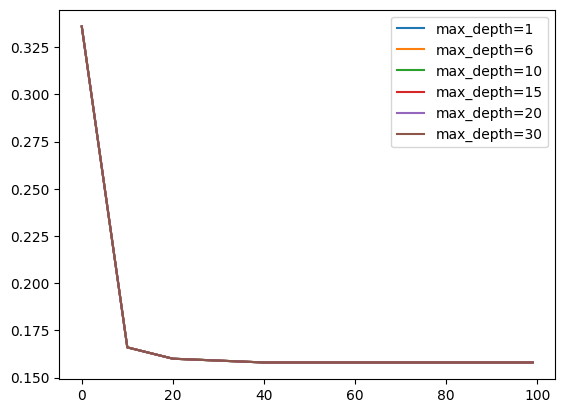

In [57]:
for k in keys:
    plt.plot(rmse_obj[k].number_iter, round(rmse_obj[k].val_rmse, 3), label=k)
    plt.legend()

In [60]:
# tune min_child_weight
rmse_obj = {}
keys = []
for w in [1, 5, 10, 15, 20, 30]:
    train_xgb(eta=0.01, max_depth=1, min_child_weight=w)
    key = f"min_child_weight={w}"
    keys.append(key)
    rmse_obj[key] = xgb_output(output)


[0]	train-rmse:0.39373	val-rmse:0.41633


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:36:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[10]	train-rmse:0.37977	val-rmse:0.40226
[20]	train-rmse:0.36712	val-rmse:0.38943
[30]	train-rmse:0.35564	val-rmse:0.37778
[40]	train-rmse:0.34519	val-rmse:0.36713
[50]	train-rmse:0.33555	val-rmse:0.35740
[60]	train-rmse:0.32659	val-rmse:0.34839
[70]	train-rmse:0.31820	val-rmse:0.34002
[80]	train-rmse:0.31034	val-rmse:0.33237
[90]	train-rmse:0.30296	val-rmse:0.32492
[99]	train-rmse:0.29670	val-rmse:0.31867
[0]	train-rmse:0.39373	val-rmse:0.41633
[10]	train-rmse:0.37977	val-rmse:0.40226
[20]	train-rmse:0.36712	val-rmse:0.38943
[30]	train-rmse:0.35564	val-rmse:0.37778


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:36:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[40]	train-rmse:0.34519	val-rmse:0.36713
[50]	train-rmse:0.33555	val-rmse:0.35740
[60]	train-rmse:0.32659	val-rmse:0.34839
[70]	train-rmse:0.31820	val-rmse:0.34002
[80]	train-rmse:0.31034	val-rmse:0.33237
[90]	train-rmse:0.30296	val-rmse:0.32492
[99]	train-rmse:0.29670	val-rmse:0.31867
[0]	train-rmse:0.39373	val-rmse:0.41633
[10]	train-rmse:0.37977	val-rmse:0.40226
[20]	train-rmse:0.36712	val-rmse:0.38943


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:36:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[30]	train-rmse:0.35564	val-rmse:0.37778
[40]	train-rmse:0.34519	val-rmse:0.36713
[50]	train-rmse:0.33555	val-rmse:0.35740
[60]	train-rmse:0.32659	val-rmse:0.34839
[70]	train-rmse:0.31820	val-rmse:0.34002
[80]	train-rmse:0.31034	val-rmse:0.33237
[90]	train-rmse:0.30296	val-rmse:0.32492
[99]	train-rmse:0.29670	val-rmse:0.31867
[0]	train-rmse:0.39373	val-rmse:0.41633
[10]	train-rmse:0.37977	val-rmse:0.40226
[20]	train-rmse:0.36712	val-rmse:0.38943


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:36:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[30]	train-rmse:0.35564	val-rmse:0.37778
[40]	train-rmse:0.34519	val-rmse:0.36713
[50]	train-rmse:0.33555	val-rmse:0.35740
[60]	train-rmse:0.32659	val-rmse:0.34839
[70]	train-rmse:0.31820	val-rmse:0.34002
[80]	train-rmse:0.31034	val-rmse:0.33237
[90]	train-rmse:0.30296	val-rmse:0.32492
[99]	train-rmse:0.29670	val-rmse:0.31867
[0]	train-rmse:0.39373	val-rmse:0.41633
[10]	train-rmse:0.37977	val-rmse:0.40226
[20]	train-rmse:0.36712	val-rmse:0.38943
[30]	train-rmse:0.35564	val-rmse:0.37778
[40]	train-rmse:0.34519	val-rmse:0.36713
[50]	train-rmse:0.33555	val-rmse:0.35740
[60]	train-rmse:0.32659	val-rmse:0.34839
[70]	train-rmse:0.31820	val-rmse:0.34002
[80]	train-rmse:0.31034	val-rmse:0.33237
[90]	train-rmse:0.30296	val-rmse:0.32492
[99]	train-rmse:0.29670	val-rmse:0.31867
[0]	train-rmse:0.39373	val-rmse:0.41633
[10]	train-rmse:0.37977	val-rmse:0.40226
[20]	train-rmse:0.36712	val-rmse:0.38943


/home/labber/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:36:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[30]	train-rmse:0.35564	val-rmse:0.37778
[40]	train-rmse:0.34519	val-rmse:0.36713
[50]	train-rmse:0.33555	val-rmse:0.35740
[60]	train-rmse:0.32659	val-rmse:0.34839
[70]	train-rmse:0.31820	val-rmse:0.34002
[80]	train-rmse:0.31034	val-rmse:0.33237
[90]	train-rmse:0.30296	val-rmse:0.32492
[99]	train-rmse:0.29670	val-rmse:0.31867


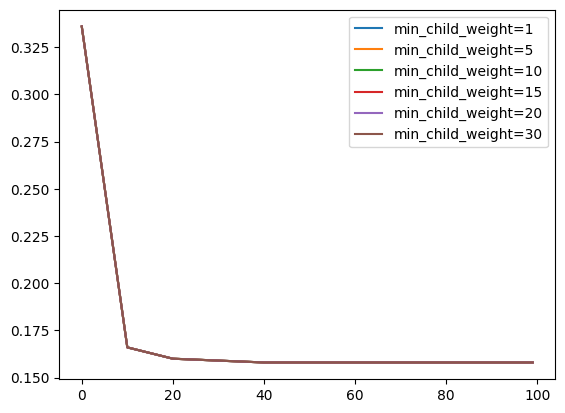

In [61]:
for k in keys:
    plt.plot(rmse_obj[k].number_iter, round(rmse_obj[k].val_rmse, 3), label=k)
    plt.legend()

results: 
eta = 0.01
max_depth = 1
min_child_weight = 1